### Objective 

Predict health insurance owners who will be interested in vehicle insurance. 
Dataset 

Data: https://www.kaggle.com/shivan118/healthcare-analytics 

### Possible Work to be done 
1. Write a Data Science Proposal for achieving the objective mentioned. 
2. Perform exploratory analysis on the data. 
3. Perform data wrangling / pre-processing. 
4. Apply any 2 features engineering technique. 
5. Plot top 10 features. 
6. Identification of the performance parameters to be improved, for the given problem  statement. 
7. Design Machine Learning models – Logistic regression and Decision tree to predict. 
8. Compare the performance of selected feature engineering techniques. 
9. Compare the performance of the 2 classifiers – Logistic regression and Decision tree to  predict. 
10. Present the conclusions/results in the format shared.

# Some useful Notebook

https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction - KAGGLE DATA SITE

https://www.kaggle.com/mingtang12/insurancepredict-decisiontr-randomf-logisticr-knn - USED COMPLETELY

https://www.kaggle.com/yashvi/vehicle-insurance-eda-and-boosting-models - USED COMPLETELY except BOOSTING model

https://www.kaggle.com/milankalkenings/comprehensive-tutorial-feature-engineering - TUTORIAL (lot of transformation)

https://www.kaggle.com/prashant111/eda-logistic-regression-pca - FEATURE SELECTION AND PCA

https://www.kaggle.com/jjmewtw/actuarial-study-eda-pca-cluster-estimation-0-88


# Data Science Process
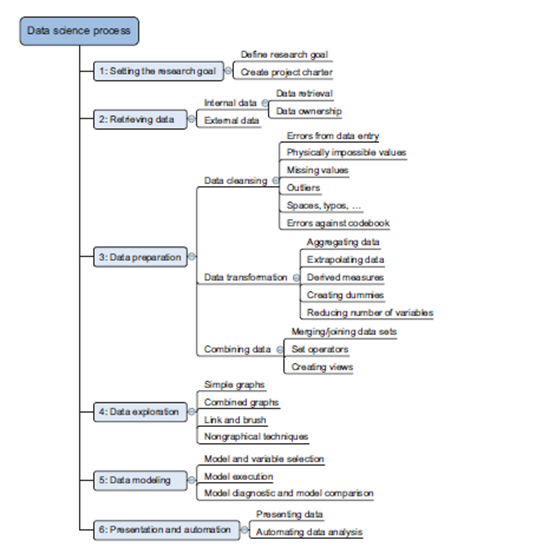

#  Data Science Proposal and Objective (Research Goal)

we are supposed to predict Customers of Insurance policy provider who will buy "Vehicle Insurance" from the information of "Health Insurance" purchase.

## Business Background and Understanding

### Insurance Policy:

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. 

### Premium
A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.


For example, you may pay a premium of Rs. 4000 each year for a health insurance cover of Rs. 100,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 100,000. 

Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 4000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 1000 customers who would be paying a premium of Rs. 4000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

### Vehicle Insurance

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

### Objective
Building a model to predict whether a customer would be interested in Vehicle Insurance


### Information provided
1. Demographics (gender, age, region code type)
2. Vehicles (Vehicle Age, Damage)
3. Policy (Premium, sourcing channel)

|id |	Unique ID for the customer|
|---|---|
|Gender |	Gender of the customer|
| Age |	Age of the customer |
| Driving_License |	0 : Customer does not have DL, 1 : Customer already has DL |
| Region_Code 	| Unique code for the region of the customer | 
| Previously_Insured 	| 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance| 
| Vehicle_Age 	| Age of the Vehicle| 
| Vehicle_Damage 	| 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.| 
| Annual_Premium 	| The amount customer needs to pay as premium in the year| 
| PolicySalesChannel 	| Anonymised Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over | Phone, In Person, etc.| 
| Vintage | 	Number of Days, Customer has been associated with the company| 
| Response | 1 : Customer is interested, 0 : Customer is not interested | 

In [1]:
# !pip install catboost

In [2]:
#All Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics as metrics
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

In [3]:
train_set = pd.read_csv('train.csv')
train_set.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
test_set = pd.read_csv('test.csv')
test_set.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [6]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [7]:
sample_submit_set = pd.read_csv('sample_submission.csv')
sample_submit_set.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


# Data wrangling / pre-processing. 

Cleaning - Missing Values, 
Error Correction - spelling, space trimming, impossible values,
Outliers

Transformation - Aggregation, Extrapolation, Derived Measures, Creating Dummies (binarization), Dimensionality Reduction

Combining - Merging tables, Union of data sets, View Creation

In [8]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [9]:
pd.isnull(train_set).sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [10]:
pd.isna(train_set).sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [11]:
train_set.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

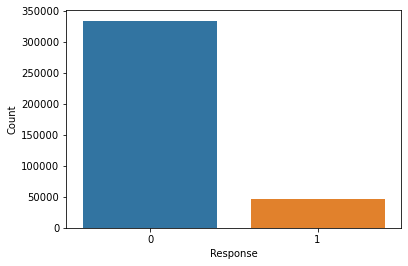

In [12]:
# ditribution of Response to check "CLASS IMBALANCE"
fig_dims = (5, 5)
fig, ax = plt.subplots()
sns.countplot('Response',
              data = train_set,
              order = train_set['Response'].value_counts().index,
              ax = ax)
ax.set(xlabel='Response', ylabel='Count')
plt.show()

In [13]:
train_set.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

# Class Imabalance Removal

In [14]:
#TODO

# Exploratory Data Analysis

Simple Graph, Combined Graphs, Non Graphical Techniques (Stats)

# Analysis of Demographics

## Analysis by Age
#### Distribution of Age 

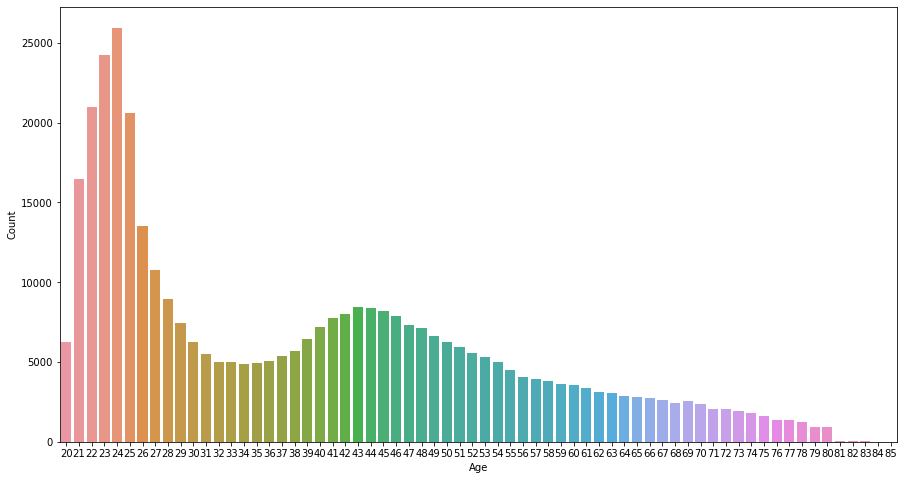

In [15]:
#ditribution of Age
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Age',
              data = train_set,
              ax = ax)
ax.set(xlabel='Age', ylabel='Count')
plt.show()

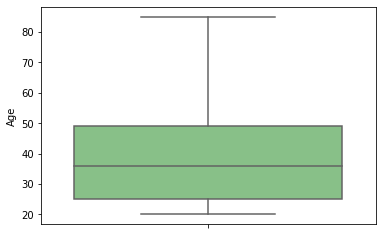

In [16]:
sns.boxplot(y = 'Age', data = train_set,palette='Accent')

#### Inference
1. More than 25000 people 24 aged, we could see 2 modes in the data around age 25 and and around age 43/44
2. We did not find any outliers or Impossible values

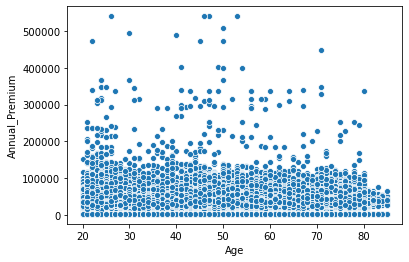

In [17]:
# Premium paying capacity or willingness by age
sns.scatterplot(x=train_set['Age'],y=train_set['Annual_Premium'])

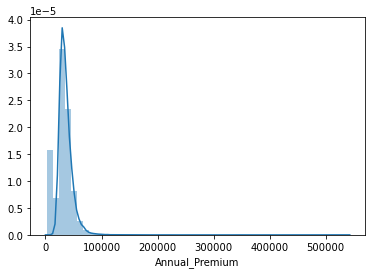

In [18]:
sns.distplot(train_set.Annual_Premium)

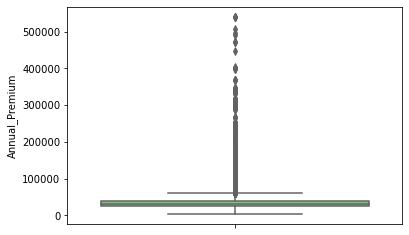

In [19]:
sns.boxplot(y = 'Annual_Premium', data = train_set,palette='Accent')

#### Inference
From the scatter plot, distribution and box plot, we can see that we have many outliers in Annual Premium paid by customers.

## Analysis by Gender

#### Proportion of Vehicle Damage by Gender

Text(0.5, 1.0, 'Vehicle Damage by Gender')

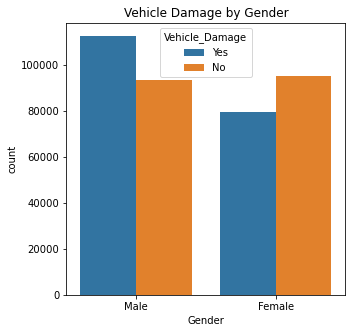

In [20]:
fig=plt.figure(figsize=(5, 5))
sns.countplot(x="Gender", hue="Vehicle_Damage", data=train_set)
plt.title("Vehicle Damage by Gender")

#### Inference

Vehicle damage by males are higher than females.
Female Customer Vehicle damange is lower than damage count.

Text(0.5, 1.0, 'Response by Gender')

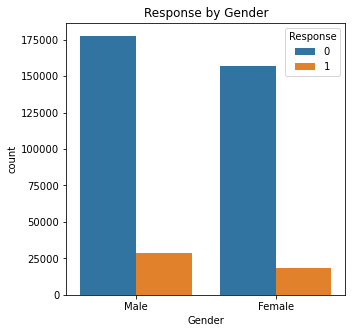

In [21]:
fig=plt.figure(figsize=(5, 5))
sns.countplot(x="Gender", hue="Response", data=train_set)
plt.title("Response by Gender")

Text(0.5, 1.0, 'Driving_License by Gender')

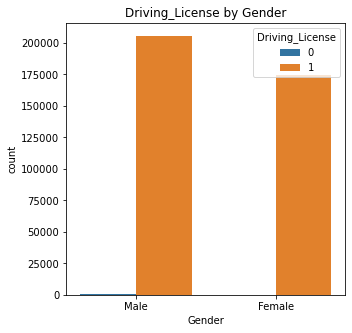

In [22]:
fig=plt.figure(figsize=(5, 5))
sns.countplot(x="Gender", hue="Driving_License", data=train_set)
plt.title("Driving_License by Gender")

## Analysis by Region

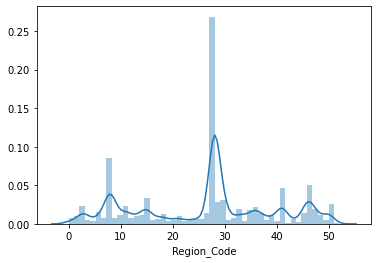

In [23]:
sns.distplot(train_set.Region_Code)

#### Inference
Inference distribution shows that there are lot of peaks / modes.
There is one peak at approximately at 27

# Analysis of Vintage

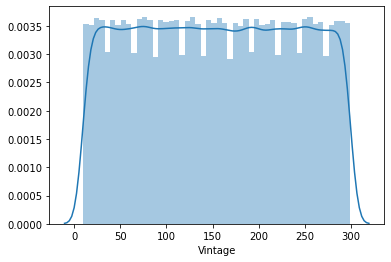

In [24]:
sns.distplot(train_set.Vintage)  

Text(0.5, 1.0, 'Driving_License')

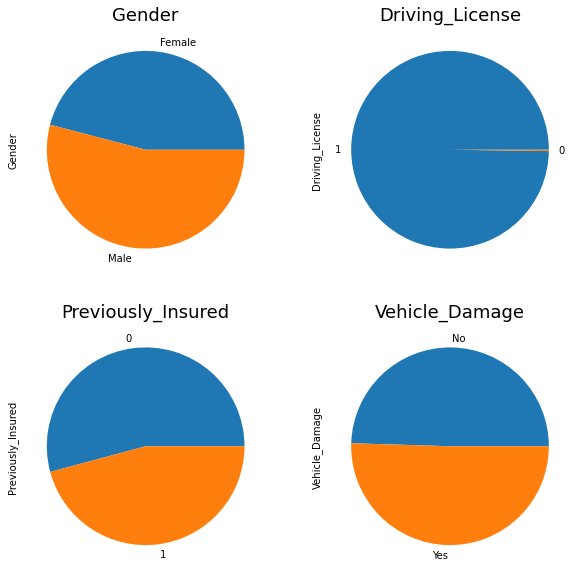

In [25]:
#ditribution of Gender,Driving_License,Previously_Insured,Previously_Insured
fig, axarr = plt.subplots(2, 2, figsize=(10, 10))

train_set['Gender'].value_counts().sort_index().plot.pie(
    ax=axarr[0][0])
axarr[0][0].set_title("Gender", fontsize=18)
train_set['Previously_Insured'].value_counts().sort_index().plot.pie(
    ax=axarr[1][0])
axarr[1][0].set_title("Previously_Insured", fontsize=18)

train_set['Vehicle_Damage'].value_counts().sort_index().plot.pie(
    ax=axarr[1][1])
axarr[1][1].set_title("Vehicle_Damage", fontsize=18)

train_set['Driving_License'].value_counts().head().plot.pie(
    ax=axarr[0][1])
axarr[0][1].set_title("Driving_License", fontsize=18)

#### Inference
Vintage Distribution is almost Uniform

# Correlation Heatmap

In [26]:
# represent binary variable as 1and 0
train_set['Gender'].replace(to_replace={'Male':0,'Female':1},
             inplace=True)
train_set['Vehicle_Damage'].replace(to_replace={'No':0,'Yes':1},
             inplace=True)
train_set['Vehicle_Age'].replace(to_replace={'< 1 Year':0,'1-2 Year':1,'> 2 Years':2},
             inplace=True)

In [27]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int64  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int64  
 7   Vehicle_Damage        381109 non-null  int64  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 34.9 MB


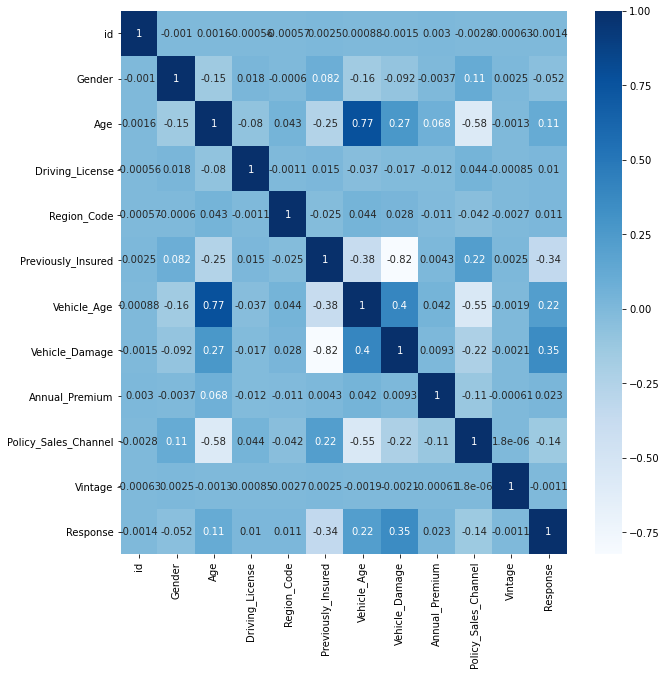

In [28]:
plt.figure(figsize=(10,10))
cor=train_set.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Blues)
plt.show()

### Inference
1. Age and Vehicle Age has high +ve correlation (0.77).
2. Vehicle Damage and Pervious purchase has high -ve correlation (-0.82).
3. Vehicle Age and Vehicle Damage has a notable 0.4 correlation.
4. Vehicle Damage and Response has a notable 0.35 correlation. (Vehicle Damage feature the top feature to correlate directly wit response and Vehicle Age by 0.22)
5. Age and policy status channel has notable -0.58 correlation.

In [29]:
train_set.describe()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,0.459239,38.822584,0.997869,26.388807,0.458210,0.609616,0.504877,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,0.498336,15.511611,0.046110,13.229888,0.498251,0.567439,0.499977,17213.155057,54.203995,83.671304,0.327936
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,0.000000,36.000000,1.000000,28.000000,0.000000,1.000000,1.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Inference

Id - irrelevant
Gender - Binary Nominal - Male/Female
Age - No outliers and impossible values. Mean - 38.8
Driving licence - Binary Nominal - Yes/No
Region Code - Categorical (Finite categories, nominal)
Previous Insured - Binary Nominal - Yes/No
Vehicle Age - Categorical (<1 year, 1-2 years, >2 years)
Vehicle Damange - Binary Nominal - Yes/No
Annual Premius - Numeric
Policy Sales Channel - Categorical
Vintage - Age of association, mean - 154.347 (days) - max days - within one year. min days - 10 days


# End of EDA

# Helper Methods

In [52]:
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year','Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']
numeric_features = ['Age','Vintage']

In [62]:
# Vector Encoding of Categorical feature
def vectorEncoding(train_set):
    train_set=train_set.drop('id',axis=1)
    train_set['Gender'] = train_set['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
    train_set=pd.get_dummies(train_set,drop_first=True)
    train_set=train_set.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
    train_set['Vehicle_Age_lt_1_Year']=train_set['Vehicle_Age_lt_1_Year'].astype('int')
    train_set['Vehicle_Age_gt_2_Years']=train_set['Vehicle_Age_gt_2_Years'].astype('int')
    train_set['Vehicle_Damage_Yes']=train_set['Vehicle_Damage_Yes'].astype('int')
    for column in cat_feat:
        train_set[column] = train_set[column].astype('str')
    return train_set;

In [31]:
# Feature Scaling of Numeric feature
def featureScaling(train_set):
    from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
    ss = StandardScaler()
    train_set[numeric_features] = ss.fit_transform(train_set[numeric_features])


    mm = MinMaxScaler()
    train_set[['Annual_Premium']] = mm.fit_transform(train_set[['Annual_Premium']])
    return train_set;

In [32]:
# Entire Preprocessing of Data Sets
def preprocessDataSets(train_set, test_set):
    train_set = vectorEncoding(train_set);
    train_set = featureScaling(train_set);
    test_set = vectorEncoding(test_set);
    test_set = featureScaling(test_set);
    return (train_set, test_set);

In [78]:
# Test Train Split
def testTrainSplit(train_set):
    train_target=train_set['Response']
    train=train_set.drop(['Response'], axis = 1)
    x_train,x_test,y_train,y_test = train_test_split(train,train_target, random_state = 0)
    return (x_train, x_test, y_train, y_test)

In [45]:
# Decision Tree Classification
def dtClassification():
    # use the best performance combinations  to test
    Tree = DecisionTreeClassifier()
    Tree.fit(x_train, y_train)
    predictions = Tree.predict(x_test)
    dt_accuracy = accuracy_score(y_true = y_test, y_pred = predictions)
    
    print("Accuracy of dt" + ' : ' + str(dt_accuracy))
    print(classification_report(y_test, predictions))

    # calculate the fpr and tpr for all thresholds of the classification
    probs = Tree.predict_proba(x_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    #  plt
    plt.title('Receiver Operating Characteristic for Decision Tree')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [35]:
# Logistic Regression Classification
def logisticRegressionClassification():
    logreg = LogisticRegression()
    logreg.fit(x_train, y_train)
    lr_predict = logreg.predict(x_test)

    print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, lr_predict)))

    print(classification_report(y_test, lr_predict))
    lr_accuracy = accuracy_score(y_test, lr_predict)
    print("Accuracy of Logistic Regression" + ' : ' + str(lr_accuracy))

    # Plot ROC_AUC for logistic regression
    probs = logreg.predict_proba(x_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic for Logistic Regression')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [36]:
# Random Forest Classification
def rfClassification():
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    rf_Predict = rf.predict(x_test)

    rf_accuracy = accuracy_score(y_test, rf_Predict)
    print("Accuracy of rf" + ' : ' + str(rf_accuracy))
    print(classification_report(y_test, rf_Predict))
    
    # Plot ROC_AUC for random forest
    probs = rf.predict_proba(x_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    #  plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic for Random Forest')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [37]:
# KNN Classification
def knnClassification():
    # build the knn model and calculate the accuracy score when n=10
    knn = KNeighborsClassifier(n_neighbors=10)
    knn.fit(x_train, y_train)
    knn_predict = knn.predict(x_test)
    knn_accuracy = accuracy_score(y_test, knn_predict)
    print("Accuracy of Logistic Regression" + ' : ' + str(knn_accuracy))
    print(classification_report(y_test, knn_predict))

    # Plot ROC_AUC for knn
    probs = knn.predict_proba(x_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    #  plt
    plt.title('Receiver Operating Characteristic for KNN')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [38]:
# Call all predefined classifications
def callAllClassfiers():
    print("Decision Tree Classification");
    dtClassification();
    print("Logistic Regression Classification");
    logisticRegressionClassification();
    print("K-Nearest Neighbour Classification");
    knnClassification();
    print("Random Forest Classification");
    rfClassification();

In [39]:
def catBoostClassification():
    catModel = CatBoostClassifier()
    catModel.fit(
        x_train,
        y_train,
        cat_features=cat_feat,
        eval_set=(x_test, y_test),
        early_stopping_rounds=10,
        verbose=100
    )
    cat_predict =  catModel.predict(x_test)
    cat_accuracy = accuracy_score(y_test, cat_predict)
    print("Accuracy of CatBoost Regression" + ' : ' + str(cat_accuracy))
    X_col = ['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
           'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
           'Vehicle_Age_lt_1_Year', 'Vehicle_Age_gt_2_Years',
           'Vehicle_Damage_Yes']
    print(X_col)
    feature_importance = catModel.get_feature_importance()
    print(feature_importance)
    feature_importance_df = pd.DataFrame(
        data={'feature_importance': feature_importance},
        index=X_col
    )
    feature_importance_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    plt.figure(figsize=(8, 6))
    sns.barplot(x=feature_importance_df['feature_importance'], y=feature_importance_df.index)
    plt.title('Feature Importance')
    plt.show()

Decision Tree Classification
Accuracy of dt : 0.8226977896261466
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     83603
           1       0.29      0.31      0.30     11675

    accuracy                           0.82     95278
   macro avg       0.60      0.60      0.60     95278
weighted avg       0.83      0.82      0.82     95278



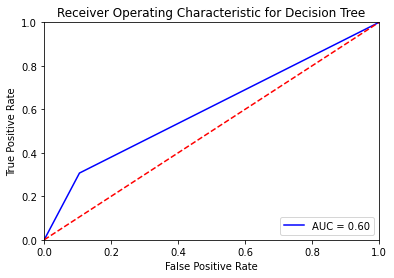

Logistic Regression Classification


C:\Users\NSR\AppData\Local\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy score with all the features: 0.8771
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83603
           1       0.10      0.00      0.00     11675

    accuracy                           0.88     95278
   macro avg       0.49      0.50      0.47     95278
weighted avg       0.78      0.88      0.82     95278

Accuracy of Logistic Regression : 0.8770545141585676


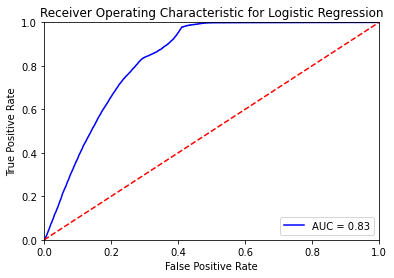

K-Nearest Neighbour Classification
Accuracy of Logistic Regression : 0.8706417011272277
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     83603
           1       0.37      0.08      0.13     11675

    accuracy                           0.87     95278
   macro avg       0.63      0.53      0.53     95278
weighted avg       0.82      0.87      0.83     95278



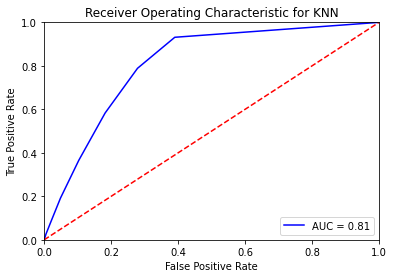

Random Forest Classification
Accuracy of rf : 0.8666323810323474
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     83603
           1       0.37      0.12      0.18     11675

    accuracy                           0.87     95278
   macro avg       0.63      0.55      0.55     95278
weighted avg       0.82      0.87      0.84     95278



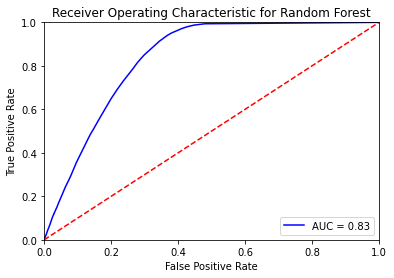

In [66]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')
train_set, test_set = preprocessDataSets(train_set, test_set)
x_train, x_test, y_train, y_test = testTrainSplit(train_set)
callAllClassfiers();

# 2 features engineering technique

1. Identify features max affecting response
2. Combine features to reduce dimensions
3. Remove correlated features - make them independent

# Plot top 10 features

Learning rate set to 0.128106
0:	learn: 0.5320867	test: 0.5323419	best: 0.5323419 (0)	total: 228ms	remaining: 3m 48s
100:	learn: 0.2630644	test: 0.2639867	best: 0.2639855 (98)	total: 13.9s	remaining: 2m 4s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.2639346435
bestIteration = 114

Shrink model to first 115 iterations.
Accuracy of CatBoost Regression : 0.8774638426499297
['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Vehicle_Age_lt_1_Year', 'Vehicle_Age_gt_2_Years', 'Vehicle_Damage_Yes']
[ 1.19698821 10.61998368  0.12047568  3.7976323  42.25746934  2.11942867
  8.11367249  0.86808644  1.83008155  0.33170185 28.74447978]


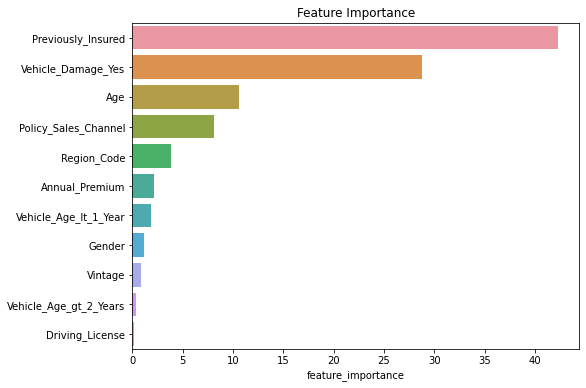

In [50]:
catBoostClassification()

# Dropping Driving_License feature

Decision Tree Classification
Accuracy of dt : 0.8226767984214614
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     83603
           1       0.29      0.31      0.30     11675

    accuracy                           0.82     95278
   macro avg       0.60      0.60      0.60     95278
weighted avg       0.83      0.82      0.83     95278



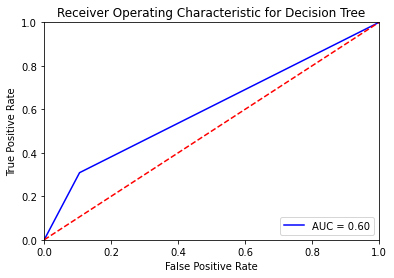

Logistic Regression Classification


C:\Users\NSR\AppData\Local\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy score with all the features: 0.8775
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83603
           1       0.00      0.00      0.00     11675

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278

Accuracy of Logistic Regression : 0.877453347047587


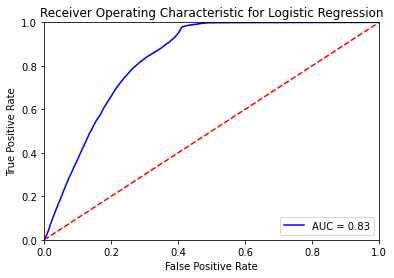

K-Nearest Neighbour Classification
Accuracy of Logistic Regression : 0.8706521967295703
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     83603
           1       0.37      0.08      0.13     11675

    accuracy                           0.87     95278
   macro avg       0.63      0.53      0.53     95278
weighted avg       0.82      0.87      0.83     95278



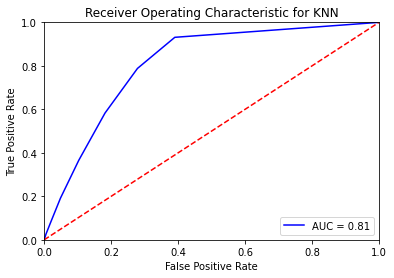

Random Forest Classification
Accuracy of rf : 0.8654988559793446
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     83603
           1       0.36      0.12      0.18     11675

    accuracy                           0.87     95278
   macro avg       0.62      0.55      0.55     95278
weighted avg       0.82      0.87      0.84     95278



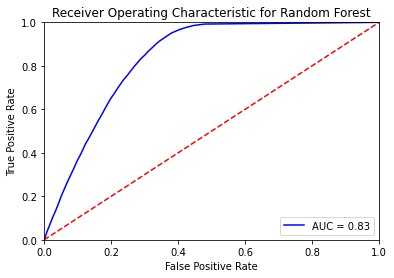

In [65]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')
train_set, test_set = preprocessDataSets(train_set, test_set)

train_set = train_set.drop(['Driving_License'], axis=1)
test_set = test_set.drop(['Driving_License'], axis=1)
x_train, x_test, y_train, y_test = testTrainSplit(train_set, test_set)
callAllClassfiers();

# Dropping last 2 features

Decision Tree Classification
Accuracy of dt : 0.8224039127605534
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     83603
           1       0.29      0.30      0.30     11675

    accuracy                           0.82     95278
   macro avg       0.59      0.60      0.60     95278
weighted avg       0.83      0.82      0.82     95278



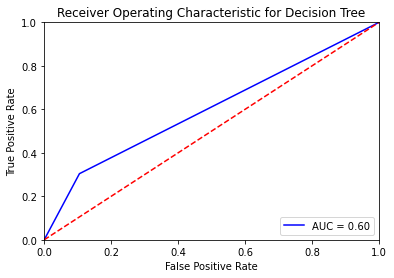

Logistic Regression Classification


C:\Users\NSR\AppData\Local\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy score with all the features: 0.8774
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83603
           1       0.00      0.00      0.00     11675

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278

Accuracy of Logistic Regression : 0.8773693822288461


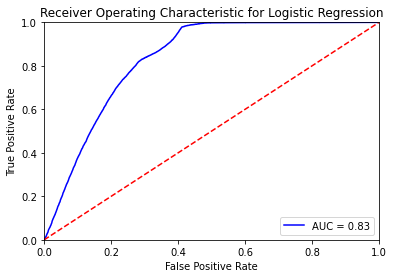

K-Nearest Neighbour Classification
Accuracy of Logistic Regression : 0.8705682319108293
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     83603
           1       0.36      0.07      0.12     11675

    accuracy                           0.87     95278
   macro avg       0.62      0.53      0.53     95278
weighted avg       0.82      0.87      0.83     95278



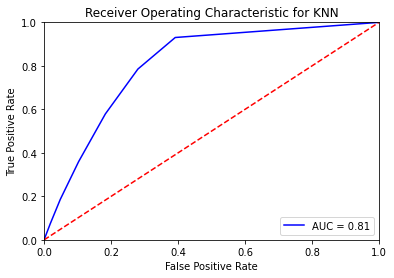

Random Forest Classification
Accuracy of rf : 0.8663070173597263
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     83603
           1       0.36      0.12      0.18     11675

    accuracy                           0.87     95278
   macro avg       0.62      0.54      0.55     95278
weighted avg       0.82      0.87      0.84     95278



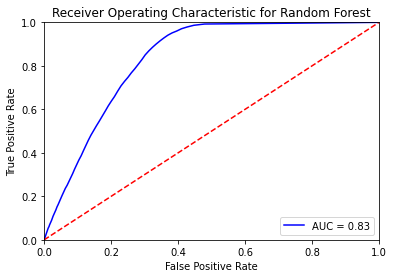

In [67]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')
train_set, test_set = preprocessDataSets(train_set, test_set)

train_set = train_set.drop(['Driving_License', 'Vehicle_Age_gt_2_Years'], axis=1)
test_set = test_set.drop(['Driving_License', 'Vehicle_Age_gt_2_Years'], axis=1)
x_train, x_test, y_train, y_test = testTrainSplit(train_set, test_set)
callAllClassfiers();

# Compare the performance of selected feature engineering techniques

# Data Modelling
Class Imabalance Ratio and Handling

Model diagnostic and Comparison

# Imbalance Ratio Removal and Test

class 0: (334399, 12)
class 1: (46710, 12)
total class of 1 and 0: 1    46710
0    46710
Name: Response, dtype: int64


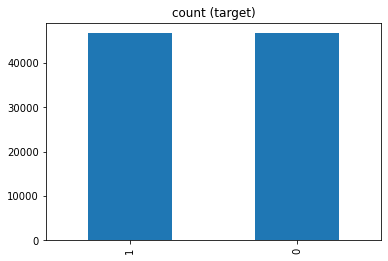

In [76]:
train_set = pd.read_csv('train.csv')
class_count_0, class_count_1 = train_set['Response'].value_counts()

class_0 = train_set[train_set['Response'] == 0]
class_1 = train_set[train_set['Response'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:",test_under['Response'].value_counts())# plot the count after under-sampeling
test_under['Response'].value_counts().plot(kind='bar', title='count (target)')

train_set = test_under

Decision Tree Classification
Accuracy of dt : 0.7143652322843075
              precision    recall  f1-score   support

           0       0.71      0.72      0.72     11614
           1       0.72      0.71      0.71     11741

    accuracy                           0.71     23355
   macro avg       0.71      0.71      0.71     23355
weighted avg       0.71      0.71      0.71     23355



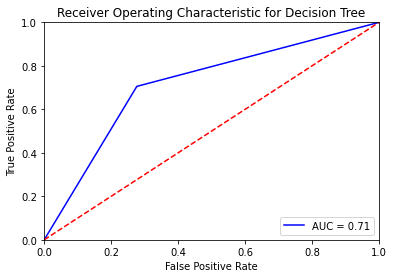

Logistic Regression Classification


C:\Users\NSR\AppData\Local\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy score with all the features: 0.7853
              precision    recall  f1-score   support

           0       0.96      0.59      0.73     11614
           1       0.71      0.98      0.82     11741

    accuracy                           0.79     23355
   macro avg       0.83      0.78      0.78     23355
weighted avg       0.83      0.79      0.78     23355

Accuracy of Logistic Regression : 0.7853136373367587


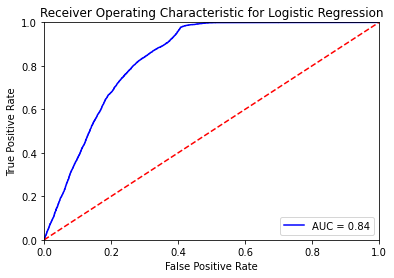

K-Nearest Neighbour Classification
Accuracy of Logistic Regression : 0.7748661956754442
              precision    recall  f1-score   support

           0       0.82      0.70      0.75     11614
           1       0.74      0.85      0.79     11741

    accuracy                           0.77     23355
   macro avg       0.78      0.77      0.77     23355
weighted avg       0.78      0.77      0.77     23355



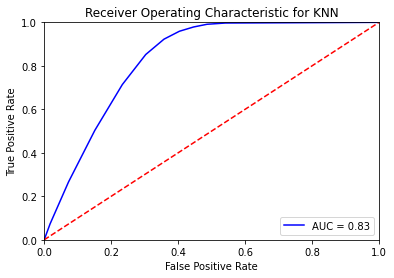

Random Forest Classification
Accuracy of rf : 0.785527724256048
              precision    recall  f1-score   support

           0       0.85      0.69      0.76     11614
           1       0.74      0.88      0.80     11741

    accuracy                           0.79     23355
   macro avg       0.80      0.79      0.78     23355
weighted avg       0.80      0.79      0.78     23355



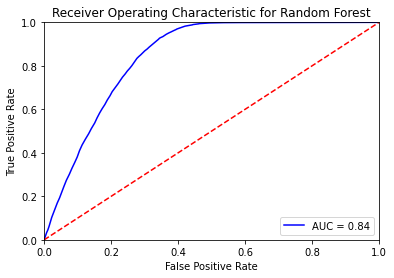

In [77]:
test_set = pd.read_csv('test.csv')

train_set, test_set = preprocessDataSets(train_set, test_set)
x_train, x_test, y_train, y_test = testTrainSplit(train_set, test_set)
callAllClassfiers();

Decision Tree Classification
Accuracy of dt : 0.821616742584857
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     83603
           1       0.28      0.30      0.29     11675

    accuracy                           0.82     95278
   macro avg       0.59      0.60      0.60     95278
weighted avg       0.83      0.82      0.82     95278



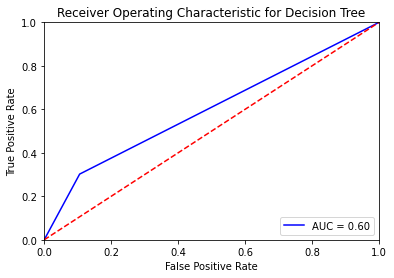

Logistic Regression Classification


C:\Users\NSR\AppData\Local\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy score with all the features: 0.8774
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83603
           1       0.00      0.00      0.00     11675

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278

Accuracy of Logistic Regression : 0.8773693822288461


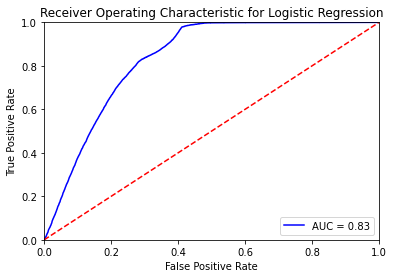

K-Nearest Neighbour Classification
Accuracy of Logistic Regression : 0.8705682319108293
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     83603
           1       0.36      0.07      0.12     11675

    accuracy                           0.87     95278
   macro avg       0.62      0.53      0.53     95278
weighted avg       0.82      0.87      0.83     95278



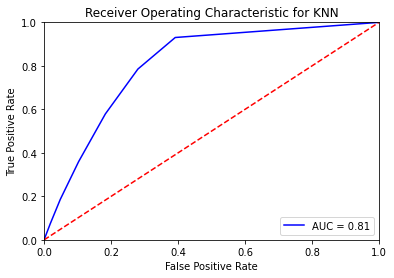

Random Forest Classification
Accuracy of rf : 0.8659501668800772
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     83603
           1       0.36      0.12      0.18     11675

    accuracy                           0.87     95278
   macro avg       0.62      0.54      0.55     95278
weighted avg       0.82      0.87      0.84     95278



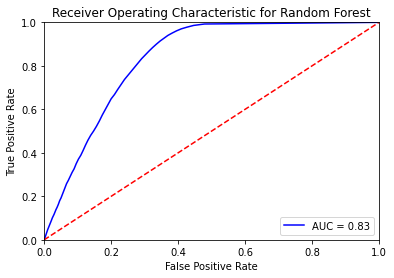

In [75]:
train_set = train_set.drop(['Driving_License', 'Vehicle_Age_gt_2_Years'], axis=1)
test_set = test_set.drop(['Driving_License', 'Vehicle_Age_gt_2_Years'], axis=1)
x_train, x_test, y_train, y_test = testTrainSplit(train_set, test_set)
callAllClassfiers();

In [81]:
train_set = pd.read_csv('train.csv')
C = (train_set.dtypes == 'object')
CategoricalVariables = list(C[C].index)

Integer = (train_set.dtypes == 'int64') 
Float   = (train_set.dtypes == 'float64') 
NumericVariables = list(Integer[Integer].index) + list(Float[Float].index)

Missing_Percentage = (train_set.isnull().sum()).sum()/np.product(train_set.shape)*100
print("The number of missing entries before cleaning: " + str(round(Missing_Percentage,5)) + " %")

The number of missing entries before cleaning: 0.0 %


In [88]:
CategoricalVariables, NumericVariables

(['Gender', 'Vehicle_Age', 'Vehicle_Damage'],
 ['id',
  'Age',
  'Driving_License',
  'Previously_Insured',
  'Vintage',
  'Response',
  'Region_Code',
  'Annual_Premium',
  'Policy_Sales_Channel'])

In [89]:
train_set

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [91]:
df_dummy = pd.get_dummies(train_set[CategoricalVariables], columns=CategoricalVariables)
print(df_dummy)
df_numeric = train_set[NumericVariables]
df_final = pd.merge(df_numeric,df_dummy,on='id')

response = ['Response']
VariablesNoTarget = [x for x in df_final.columns if x not in response]
print("Dummy transformation was successful")

        Gender_Female  Gender_Male  Vehicle_Age_1-2 Year  \
0                   0            1                     0   
1                   0            1                     1   
2                   0            1                     0   
3                   0            1                     0   
4                   1            0                     0   
...               ...          ...                   ...   
381104              0            1                     1   
381105              0            1                     0   
381106              0            1                     0   
381107              1            0                     0   
381108              0            1                     1   

        Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  Vehicle_Damage_No  \
0                          0                      1                  0   
1                          0                      0                  1   
2                          0                      1      

KeyError: 'id'

# Identification of the performance parameters to be improved, for the given problem  statement (Hyper Parameter Tuning)

# Conclusion and Results